(-0.5, 620.5, 347.5, -0.5)

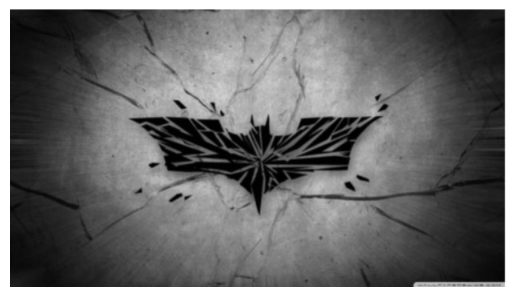

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread(r"C:\Users\student\Pictures\Screenshots\Screenshot 2025-04-24 110510.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.axis('off')

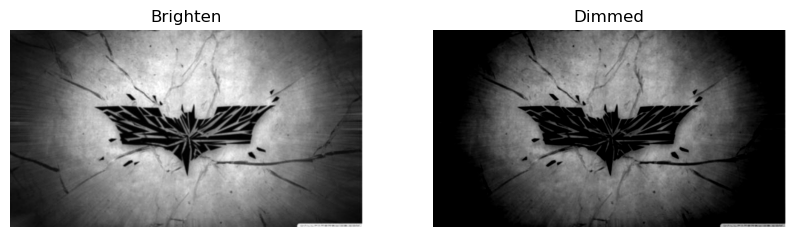

In [6]:
def brightness(image,x):
    height,width=image.shape
    image2=np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            image2[i,j]=np.clip(image[i,j]+x,0,255)
    return image2
    
bright=brightness(image,50)
dim=brightness(image,-50)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(bright,cmap='gray')
plt.title('Brighten')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(dim,cmap='gray')
plt.title('Dimmed')
plt.axis('off')
plt.show()


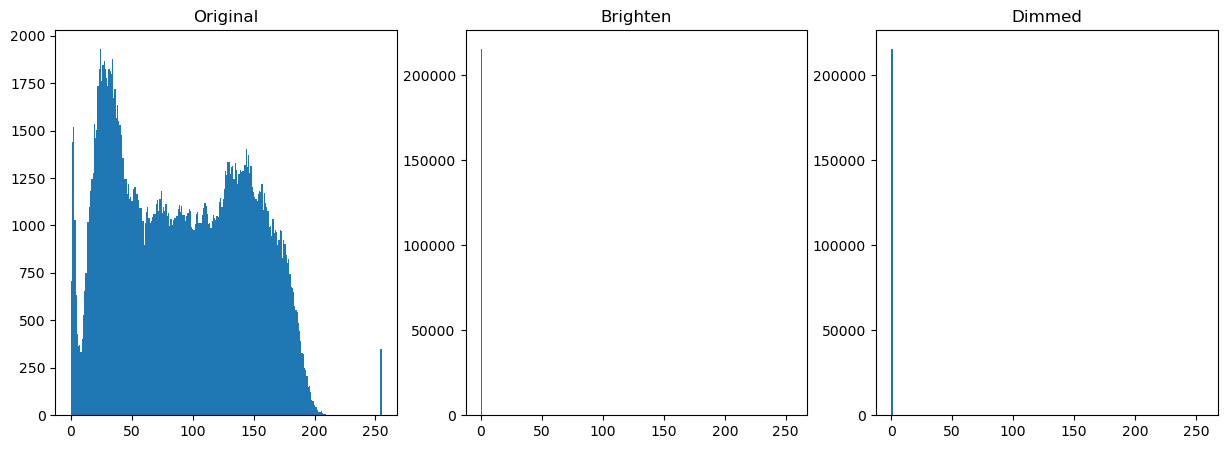

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title('Original')
plt.subplot(1,3,2)
plt.hist(bright.ravel(),bins=256,range=(0,255))
plt.title('Brighten')
plt.subplot(1,3,3)
plt.hist(dim.ravel(),bins=256,range=(0,255))
plt.title('Dimmed')
plt.show()

(-0.5, 620.5, 347.5, -0.5)

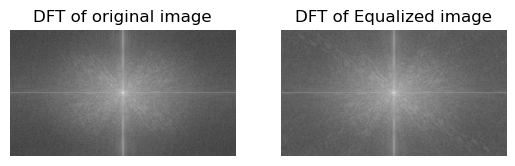

In [9]:
image_eq=cv2.equalizeHist(image)
def DFT(image):
    dft=np.fft.fft2(image)
    dft_shifted=np.fft.fftshift(dft)
    mg=20*np.log(np.abs(dft_shifted))
    return mg
dft_1=DFT(image)
dft_2=DFT(image_eq)
plt.subplot(1,2,1)
plt.imshow(dft_1,cmap='gray')
plt.title('DFT of original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(dft_2,cmap='gray')
plt.title('DFT of Equalized image')
plt.axis('off')


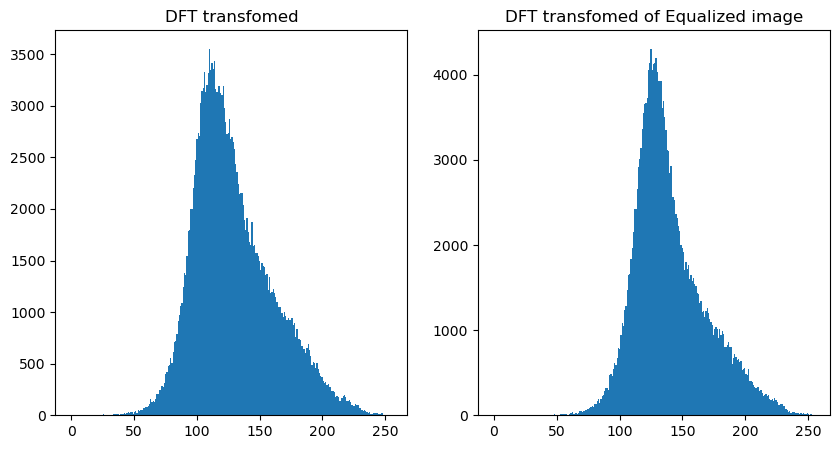

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(dft_1.ravel(),bins=256,range=(0,255))
plt.title('DFT transfomed')
plt.subplot(1,2,2)
plt.hist(dft_2.ravel(),bins=256,range=(0,255))
plt.title('DFT transfomed of Equalized image')
plt.show()


(-0.5, 620.5, 347.5, -0.5)

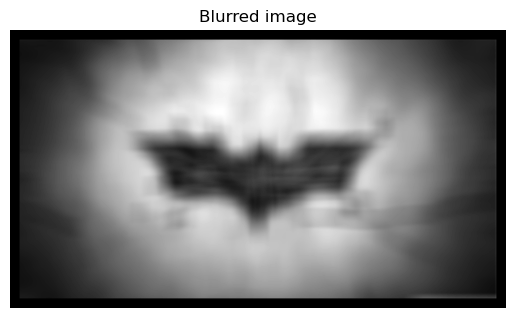

In [11]:
blur=np.ones((25,25),np.float32)/(625.0)
blur_size=25
blurred=np.zeros_like(image)
h,w=image.shape
offset=blur_size//2
for i in range(offset,h-offset):
    for j in range(offset,w-offset):
        region=image[i-offset:i+offset+1,j-offset:j+offset+1]
        blurred_vl=np.sum(region*blur)
        if region.shape == blur.shape:
            blurred[i, j] = np.clip(blurred_vl, 0, 255)
plt.imshow(blurred,cmap='gray')
plt.title('Blurred image')
plt.axis('off')

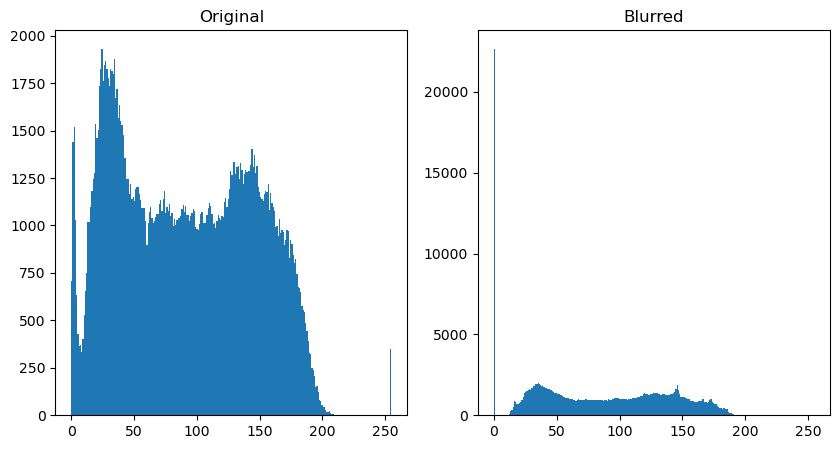

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title('Original')
plt.subplot(1,2,2)
plt.hist(blurred.ravel(),bins=256,range=(0,255))
plt.title('Blurred')
plt.show()

(-0.5, 620.5, 347.5, -0.5)

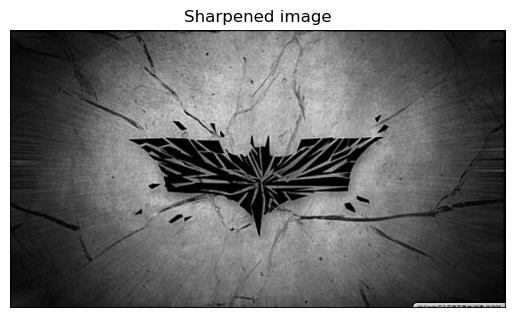

In [13]:
sharpen=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32)
offset=3//2
Sharpened=np.zeros_like(image)
for i in range(offset,h-offset):
    for j in range(offset,w-offset):
        region=image[i-offset:i+offset+1,j-offset:j+offset+1]
        Sharpened_vl=np.sum(region*sharpen)
        if region.shape == sharpen.shape:
            Sharpened[i, j] = np.clip(Sharpened_vl, 0, 255)
plt.imshow(Sharpened,cmap='gray')
plt.title('Sharpened image')
plt.axis('off')

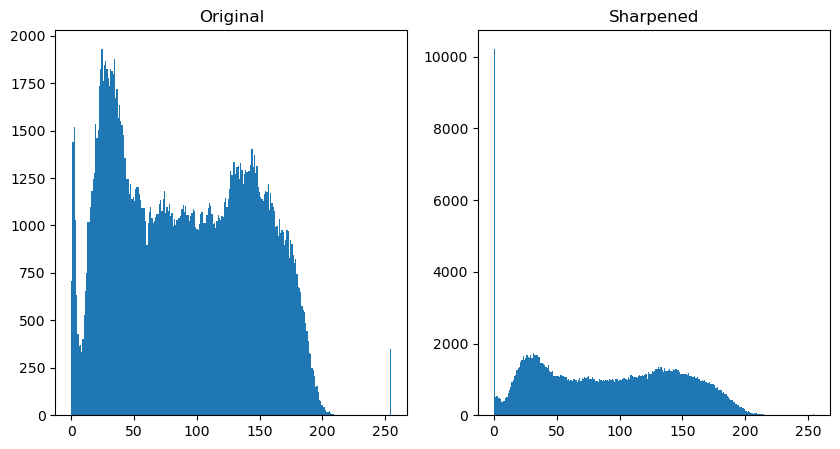

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title('Original')
plt.subplot(1,2,2)
plt.hist(Sharpened.ravel(),bins=256,range=(0,255))
plt.title('Sharpened')
plt.show()

(-0.5, 620.5, 347.5, -0.5)

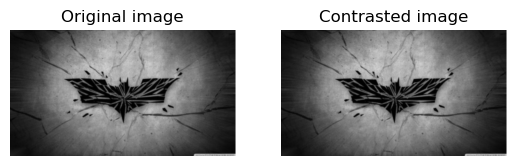

In [15]:
min,max=image.min(),image.max()
contrast_img=np.zeros_like(image)
contrast_img=((image-min)/(max-min))*255
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(contrast_img,cmap='gray')
plt.title('Contrasted image')
plt.axis('off')

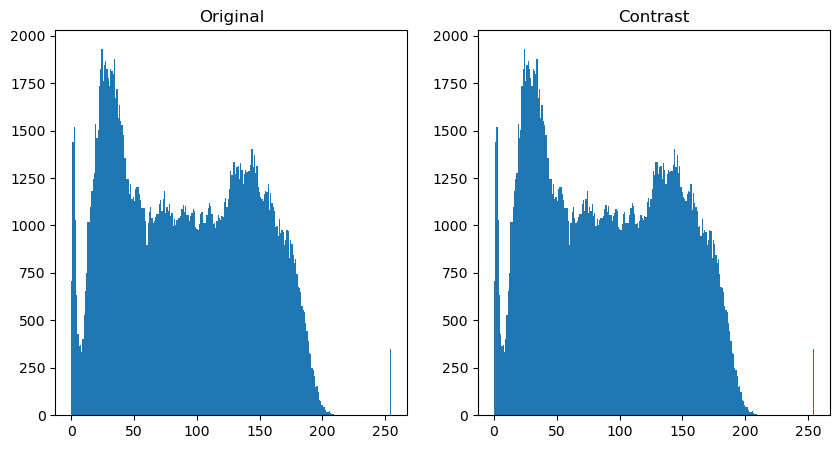

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title('Original')
plt.subplot(1,2,2)
plt.hist(contrast_img.ravel(),bins=256,range=(0,255))
plt.title('Contrast')
plt.show()

(-0.5, 620.5, 347.5, -0.5)

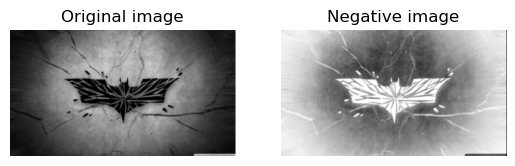

In [17]:
Neg_img=np.zeros_like(image)
Neg_img=255-image
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Neg_img,cmap='gray')
plt.title('Negative image')
plt.axis('off')

Text(0.5, 1.0, 'Threshold_limiting image')

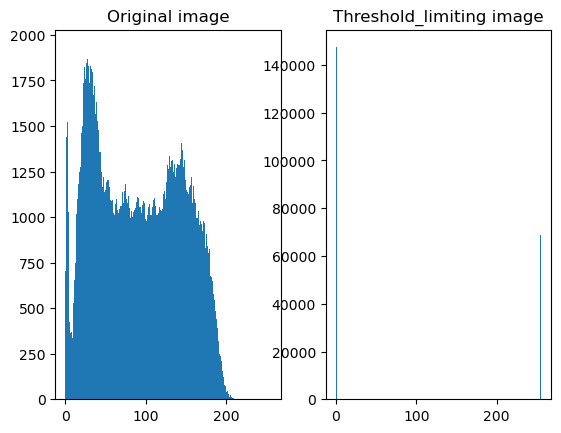

In [18]:
def Thresh(n,image):
    h,w=image.shape
    image_2=np.zeros_like(image)
    for i in range(0,h):
        for j in range(0,w):
            if(image[i,j]<n):
                image_2[i,j]=0
            else:
                image_2[i,j]=255
    return image_2;
Thre_img=Thresh(255//2,image)
plt.subplot(1,2,1)
plt.hist(image.ravel(),bins=256,range=(0,255))
plt.title('Original image')
plt.subplot(1,2,2)
plt.hist(Thre_img.ravel(),bins=256,range=(0,255))
plt.title('Threshold_limiting image')